# Vishwakarma Institute of Technology - Python Tutorial Tasks

This notebook covers all 13 tutorial tasks using the Cardiovascular Disease Dataset.

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_1samp, ttest_ind, ttest_rel, f_oneway, zscore
from scipy import stats

## Task 1: Load dataset and classify columns

In [28]:
df = pd.read_csv(r'C:\Users\ashvi\Documents\VS_Codes\VITWork\Second_Year\R(Probability_and_Statistics)\Cardiovascular_Disease_Dataset.csv')

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print('Numerical columns:', numerical_cols)
print('Categorical columns:', categorical_cols)

Numerical columns: ['patientid', 'age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels', 'target']
Categorical columns: []


## Task 2: Descriptive statistics & boxplot

Column: patientid
Mean: 5048704.412
Median: 4952508.5
Mode: 103368
Variance: 8386262875945.792
Standard Deviation: 2895904.5004878514


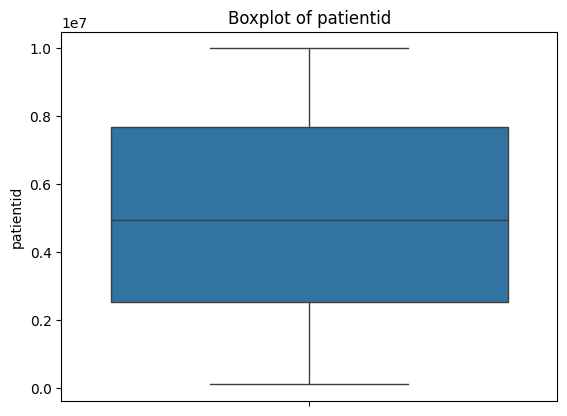

Column: age
Mean: 49.242
Median: 49.0
Mode: 20
Variance: 319.14858458458457
Standard Deviation: 17.864730185048543


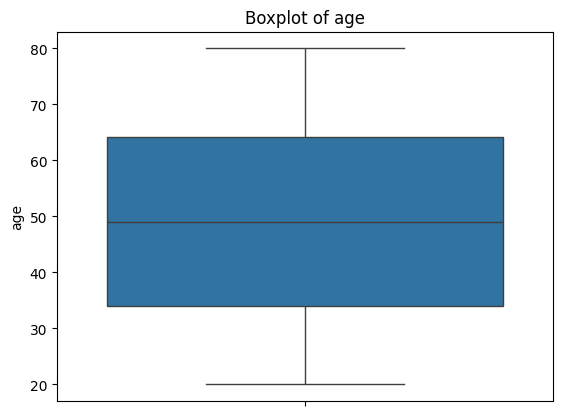

Column: gender
Mean: 0.765
Median: 1.0
Mode: 1
Variance: 0.17995495495495498
Standard Deviation: 0.4242109792956271


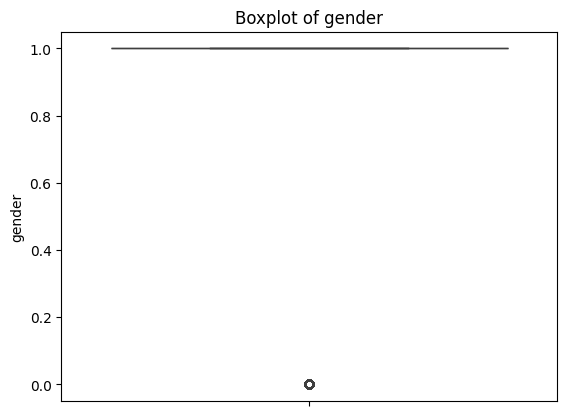

Column: chestpain
Mean: 0.98
Median: 1.0
Mode: 0
Variance: 0.9085085085085085
Standard Deviation: 0.9531571268728511


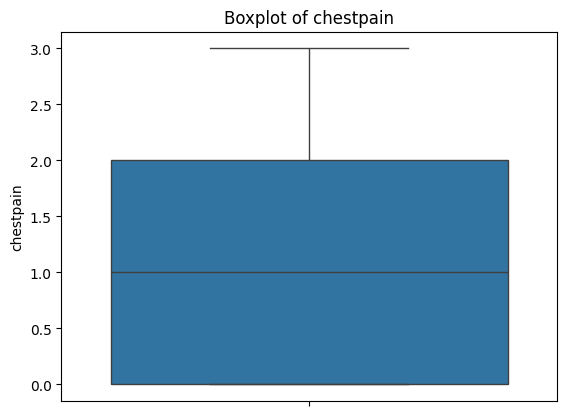

Column: restingBP
Mean: 151.747
Median: 147.0
Mode: 127
Variance: 897.9149059059058
Standard Deviation: 29.965228280557213


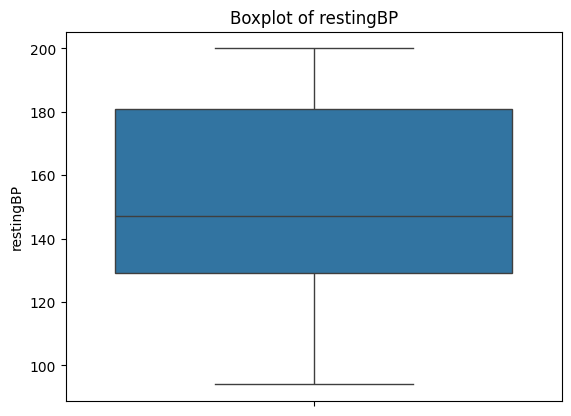

Column: serumcholestrol
Mean: 311.447
Median: 318.0
Mode: 0
Variance: 17541.360551551552
Standard Deviation: 132.44380148406927


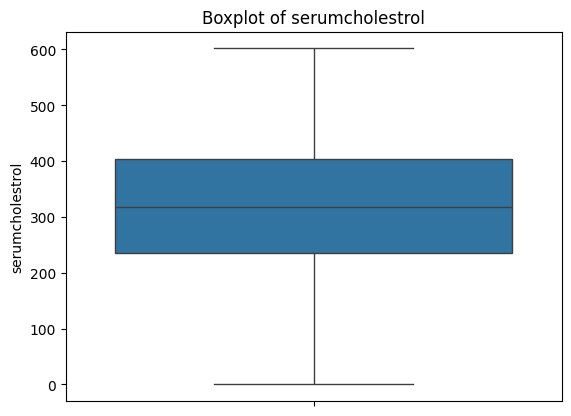

Column: fastingbloodsugar
Mean: 0.296
Median: 0.0
Mode: 0
Variance: 0.20859259259259258
Standard Deviation: 0.45671938057476014


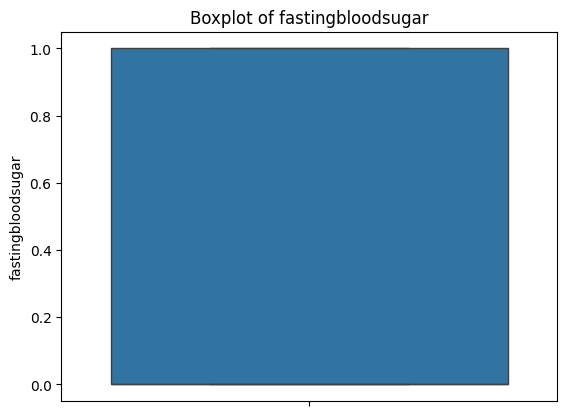

Column: restingrelectro
Mean: 0.748
Median: 1.0
Mode: 0
Variance: 0.5930890890890892
Standard Deviation: 0.7701227753346146


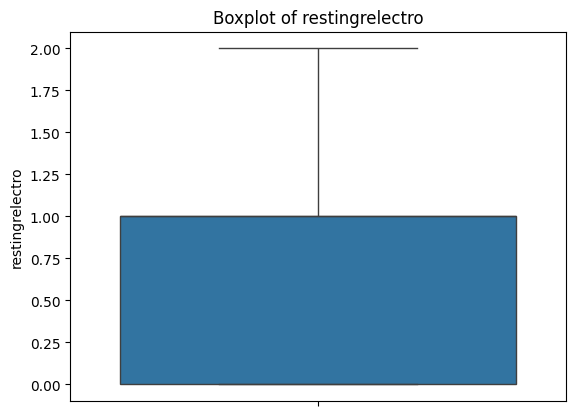

Column: maxheartrate
Mean: 145.477
Median: 146.0
Mode: 186
Variance: 1168.9744454454453
Standard Deviation: 34.190268285660544


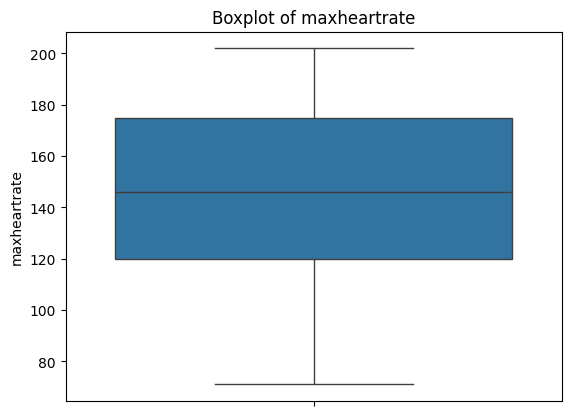

Column: exerciseangia
Mean: 0.498
Median: 0.0
Mode: 0
Variance: 0.2502462462462462
Standard Deviation: 0.5002461856388775


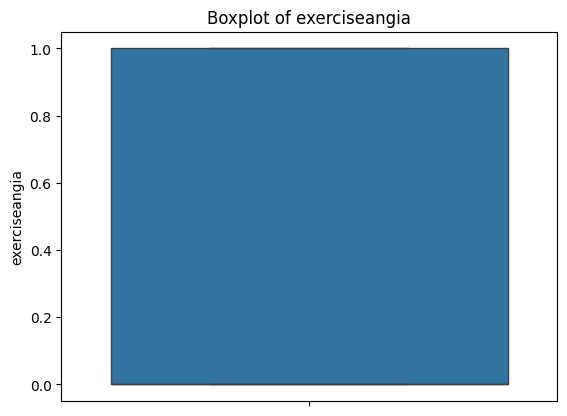

Column: oldpeak
Mean: 2.7077
Median: 2.4
Mode: 2.4
Variance: 2.9609917017017016
Standard Deviation: 1.720753236725621


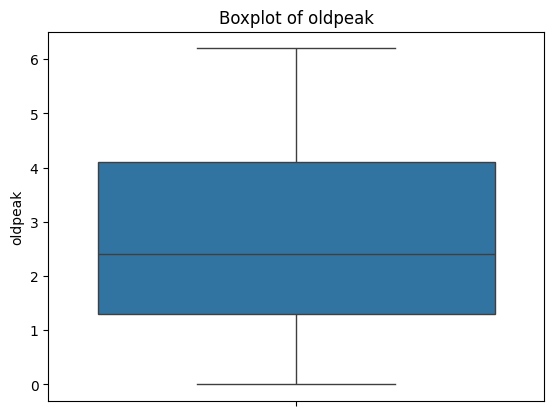

Column: slope
Mean: 1.54
Median: 2.0
Mode: 2
Variance: 1.0074074074074075
Standard Deviation: 1.0036968702787747


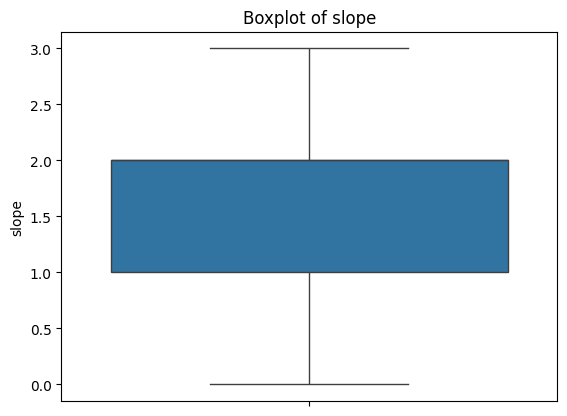

Column: noofmajorvessels
Mean: 1.222
Median: 1.0
Mode: 1
Variance: 0.9556716716716717
Standard Deviation: 0.9775846110039129


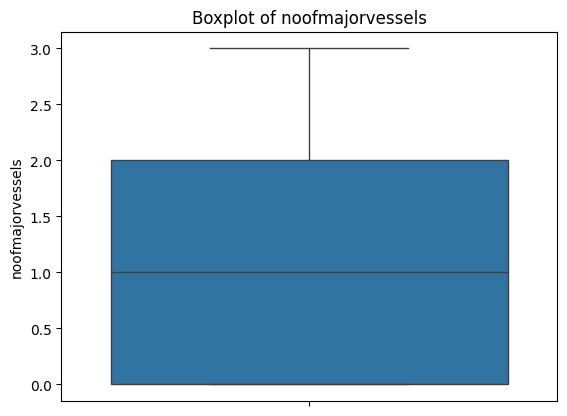

Column: target
Mean: 0.58
Median: 1.0
Mode: 1
Variance: 0.24384384384384386
Standard Deviation: 0.49380547166252003


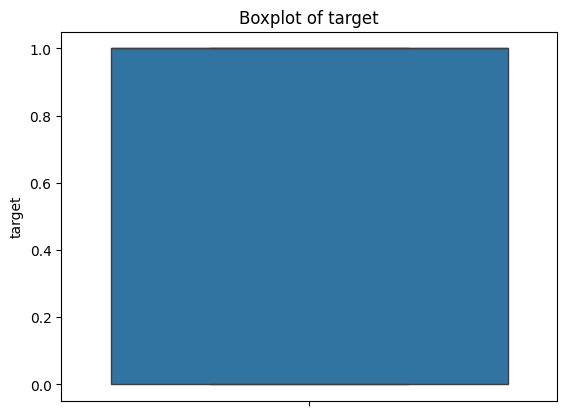

In [29]:
for col in numerical_cols:
    print(f'Column: {col}')
    print('Mean:', df[col].mean())
    print('Median:', df[col].median())
    mode_val = df[col].mode()
    print('Mode:', mode_val.iloc[0] if not mode_val.empty else 'NaN')
    print('Variance:', df[col].var())
    print('Standard Deviation:', df[col].std())
    plt.figure()
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## Task 3: Random sampling & compare means

In [30]:
sample_df = df[numerical_cols].sample(n=10, replace=True)
print('Sample mean:', sample_df.mean())
print('Population mean:', df[numerical_cols].mean())

Sample mean: patientid            5414763.60
age                       48.10
gender                     1.00
chestpain                  1.20
restingBP                153.90
serumcholestrol          353.10
fastingbloodsugar          0.30
restingrelectro            0.80
maxheartrate             143.50
exerciseangia              0.40
oldpeak                    3.64
slope                      2.20
noofmajorvessels           1.40
target                     0.90
dtype: float64
Population mean: patientid            5.048704e+06
age                  4.924200e+01
gender               7.650000e-01
chestpain            9.800000e-01
restingBP            1.517470e+02
serumcholestrol      3.114470e+02
fastingbloodsugar    2.960000e-01
restingrelectro      7.480000e-01
maxheartrate         1.454770e+02
exerciseangia        4.980000e-01
oldpeak              2.707700e+00
slope                1.540000e+00
noofmajorvessels     1.222000e+00
target               5.800000e-01
dtype: float64


## Task 4: Manual Binomial probability function

In [31]:
def binomial_prob(n, k, p):
    return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

print("Binomial probability (10 choose 2, p=0.1):", binomial_prob(10, 2, 0.1))

Binomial probability (10 choose 2, p=0.1): 0.19371024450000007


## Task 5: Normal Distribution Curve

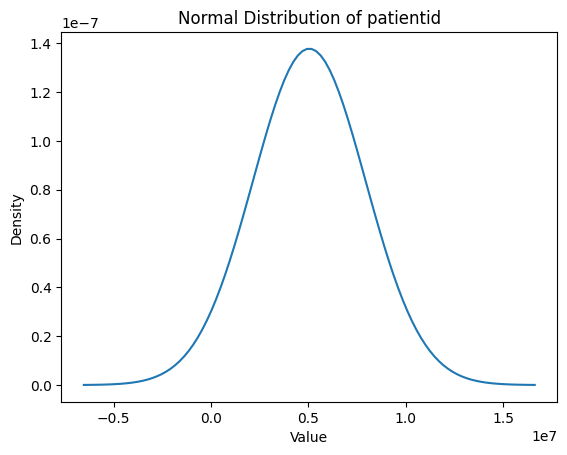

In [32]:
mu = df[numerical_cols[0]].mean()
sigma = df[numerical_cols[0]].std()
x_vals = np.linspace(mu-4*sigma, mu+4*sigma, 100)
y_vals = norm.pdf(x_vals, mu, sigma)
plt.plot(x_vals, y_vals)
plt.title(f'Normal Distribution of {numerical_cols[0]}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

## Task 6: Area under Standard Normal Curve

In [33]:
z_val = 1.96
area = norm.cdf(z_val) - norm.cdf(-z_val)
print('Area under curve for ±1.96 z:', area)

Area under curve for ±1.96 z: 0.950004209703559


## Task 7: Conditional probability simulation

In [34]:
np.random.seed(42)
n_sim = 10000
rolls = np.random.randint(1,7, n_sim)
prob = np.sum((rolls % 2 == 0) & (rolls > 3)) / np.sum(rolls > 3)
print('Conditional probability (even | >3):', prob)

Conditional probability (even | >3): 0.663411717815863


## Task 8: CLT - Sampling Distribution

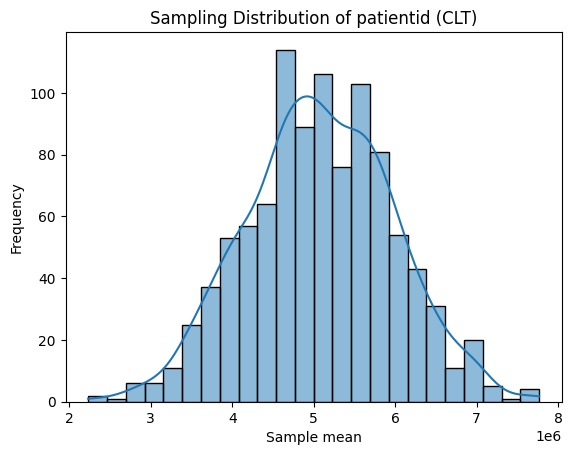

In [35]:
col = numerical_cols[0]
sample_means = [df[col].sample(10, replace=True).mean() for _ in range(1000)]
sns.histplot(sample_means, kde=True)
plt.title(f'Sampling Distribution of {col} (CLT)')
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.show()

## Task 9: Confidence Interval for population mean

In [36]:
sample = df[col]
conf_int = stats.t.interval(0.95, len(sample)-1, loc=sample.mean(), scale=sample.sem())
print(f'95% CI for {col}: {conf_int}')

95% CI for patientid: (np.float64(4868999.968574001), np.float64(5228408.855425998))


## Task 10: Z-test

In [37]:
pop_mean = df[col].mean()  # example
z_stat = (sample.mean() - pop_mean)/(sample.std(ddof=1)/np.sqrt(len(sample)))
print(f'Z-statistic for {col}: {z_stat}')

Z-statistic for patientid: 0.0


## Task 11: Independent and Paired t-tests

In [38]:
x1 = df[col].sample(10, random_state=1)
x2 = df[col].sample(10, random_state=2)
ind_t = ttest_ind(x1, x2)
print('Independent t-test:', ind_t)

before = df[col].sample(10, random_state=3)
after = before + np.random.normal(0,1,10)  # simulate change
paired_t = ttest_rel(before, after)
print('Paired t-test:', paired_t)

Independent t-test: TtestResult(statistic=np.float64(-0.6545630562386866), pvalue=np.float64(0.5210260420068539), df=np.float64(18.0))
Paired t-test: TtestResult(statistic=np.float64(-0.01742311596445728), pvalue=np.float64(0.9864792056469187), df=np.int64(9))


## Task 12: One-way ANOVA

In [39]:
group1 = df[col].sample(10, random_state=4)
group2 = df[col].sample(10, random_state=5)
group3 = df[col].sample(10, random_state=6)
anova_res = f_oneway(group1, group2, group3)
print('ANOVA result:', anova_res)

ANOVA result: F_onewayResult(statistic=np.float64(2.1429230687192), pvalue=np.float64(0.1368403249752684))


## Task 13: End-to-End Case
- Load dataset → done
- EDA → summary stats, boxplots, histograms
- Select test → t-test / ANOVA / proportion test
- Perform analysis → above tasks
- Report conclusion → summarize in Markdown

Dataset shape: (1000, 14)

Numerical columns:
 ['patientid', 'age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels', 'target']

Categorical columns:
 []

First 5 rows:
    patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1

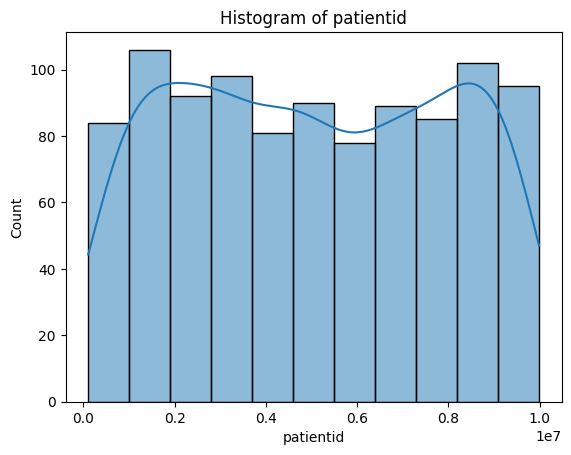

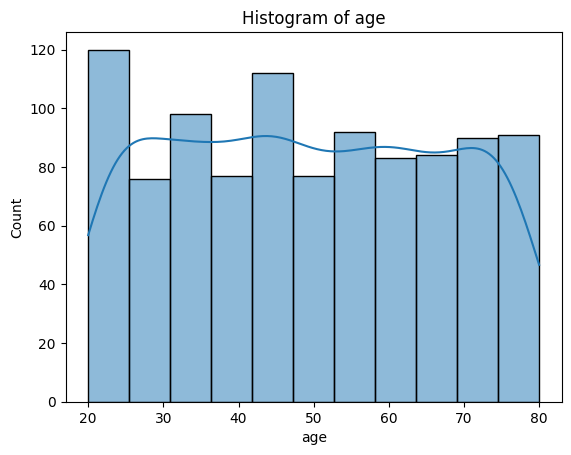

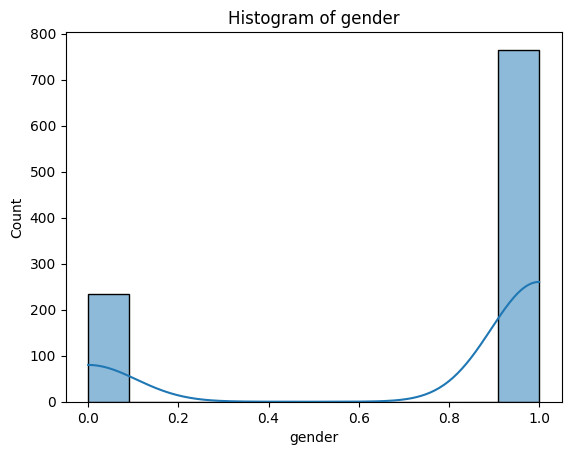

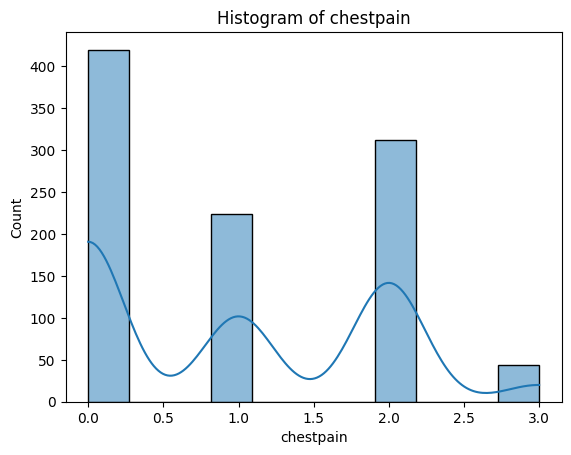

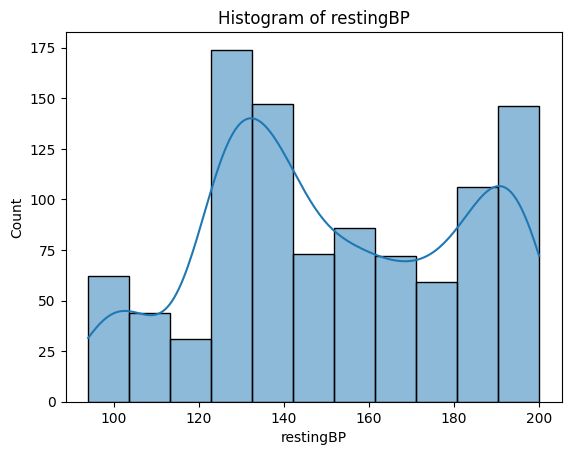

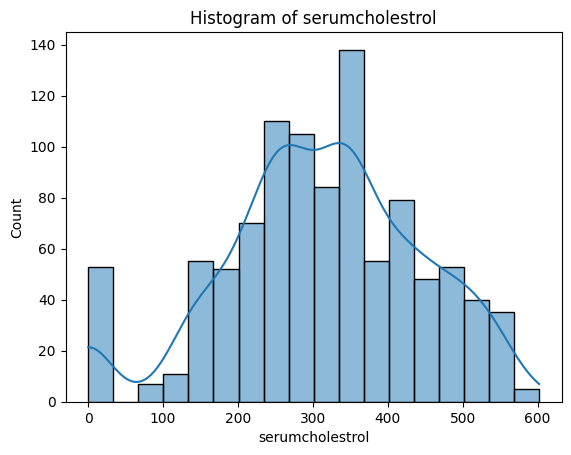

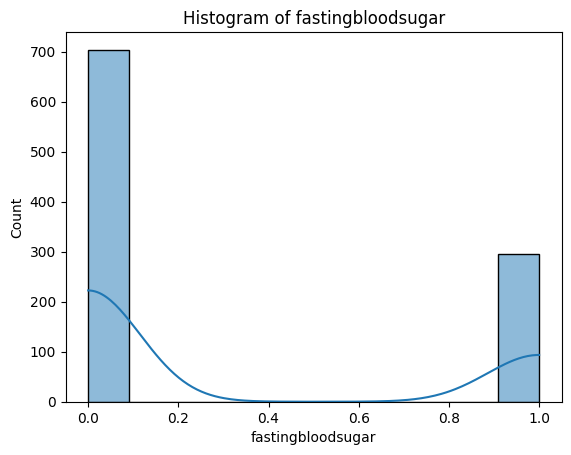

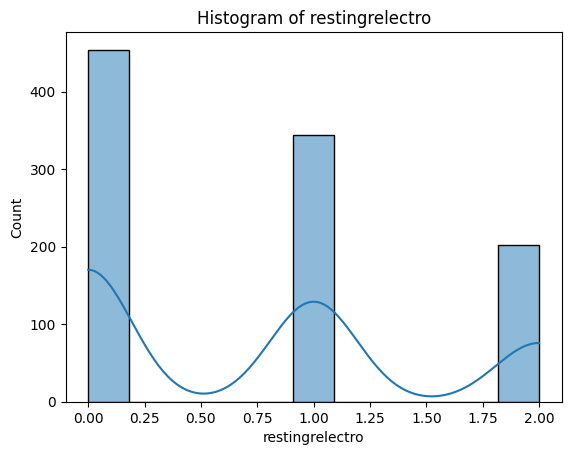

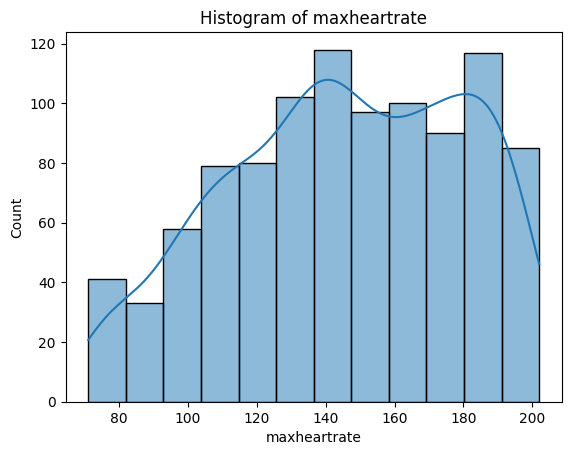

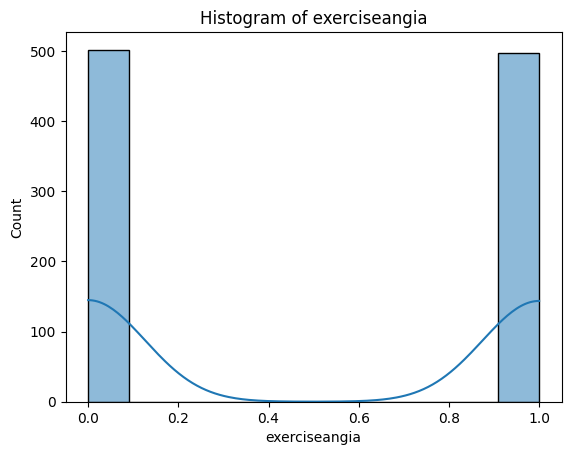

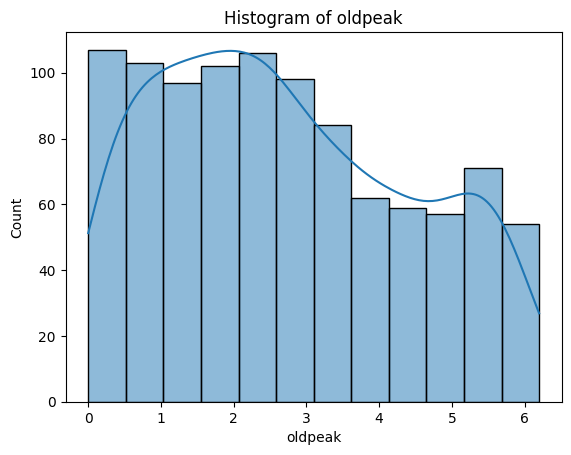

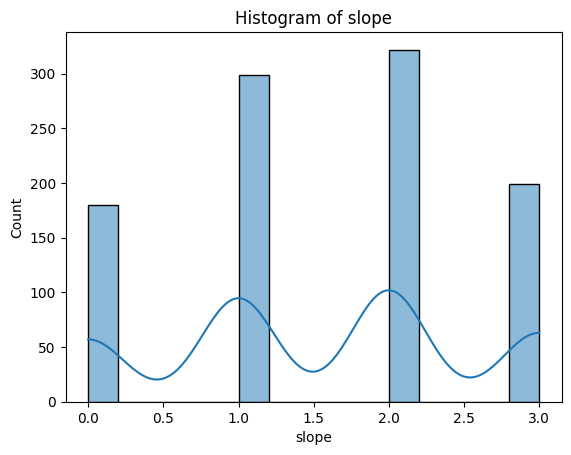

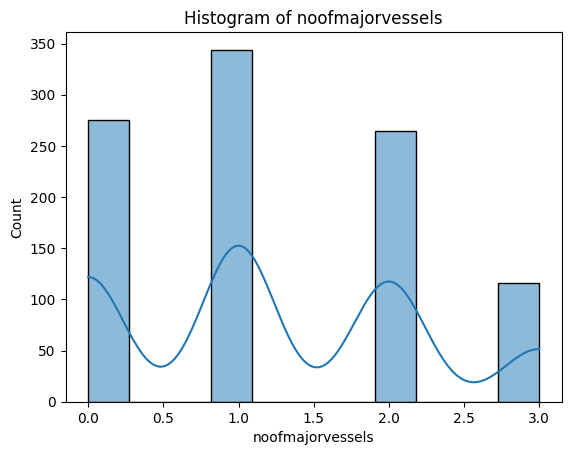

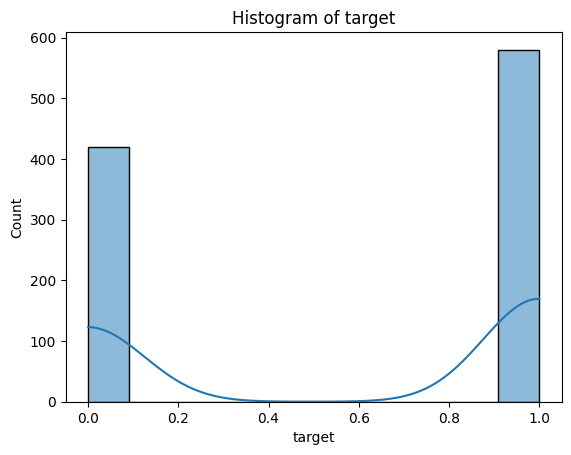

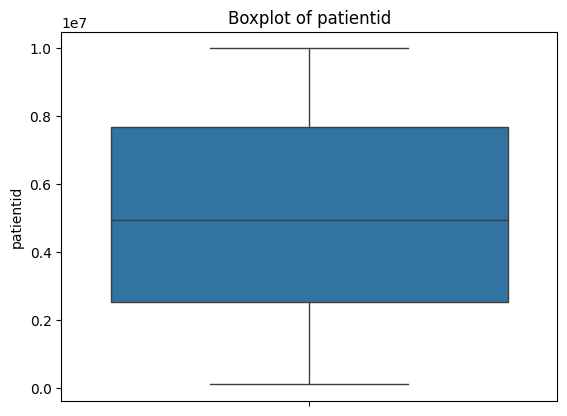

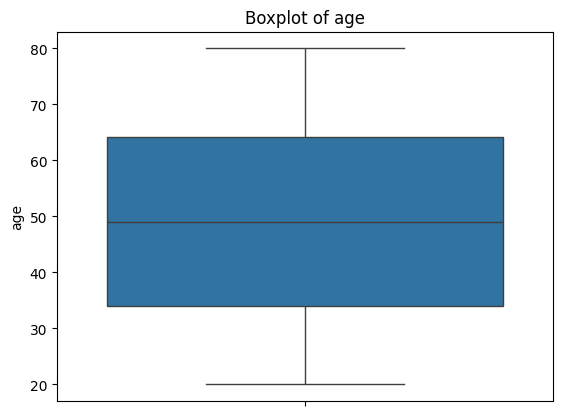

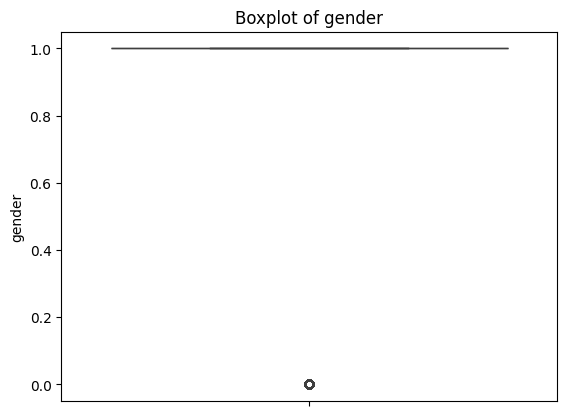

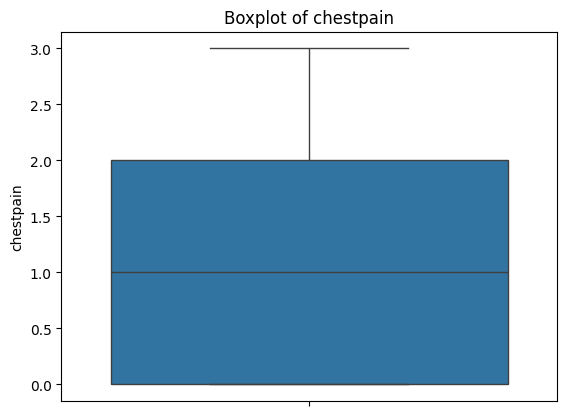

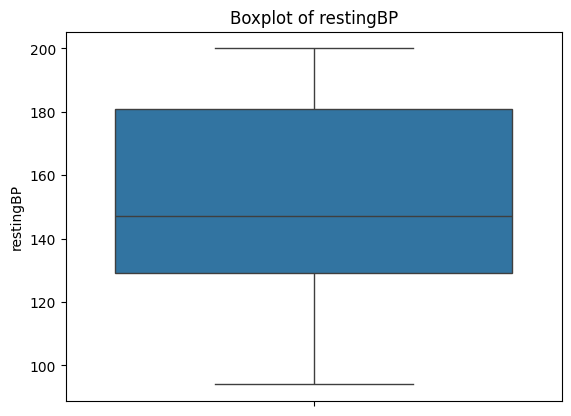

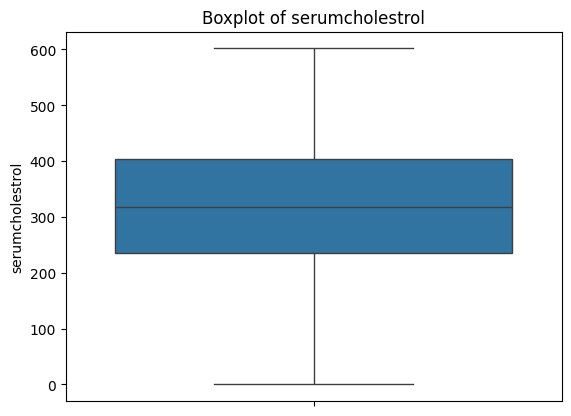

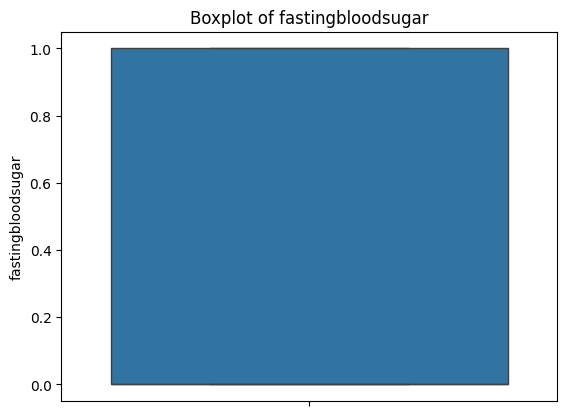

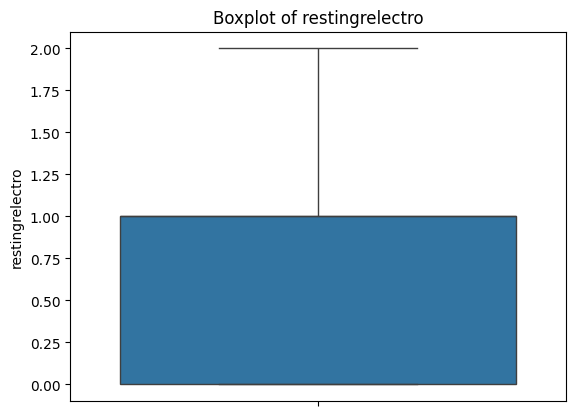

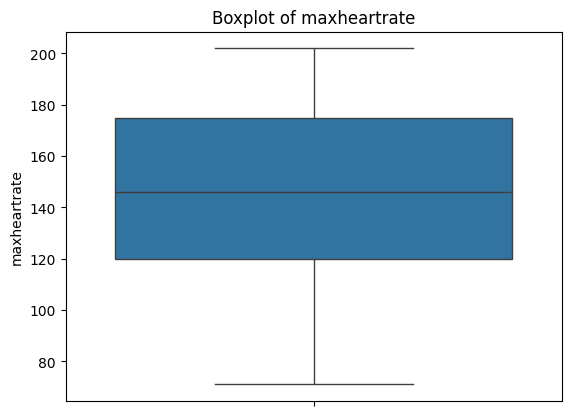

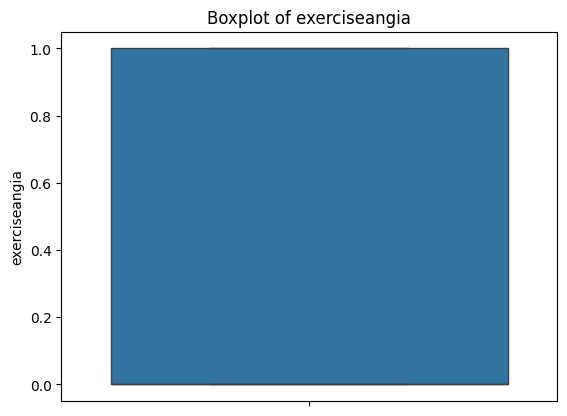

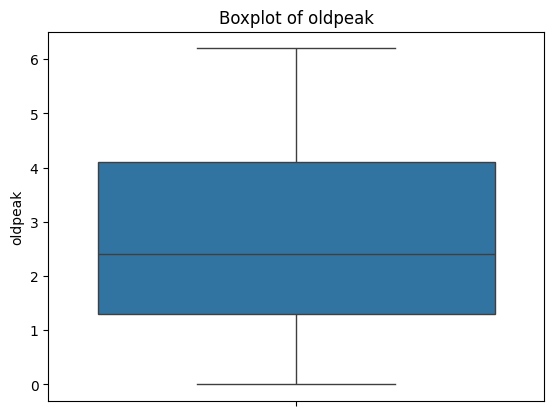

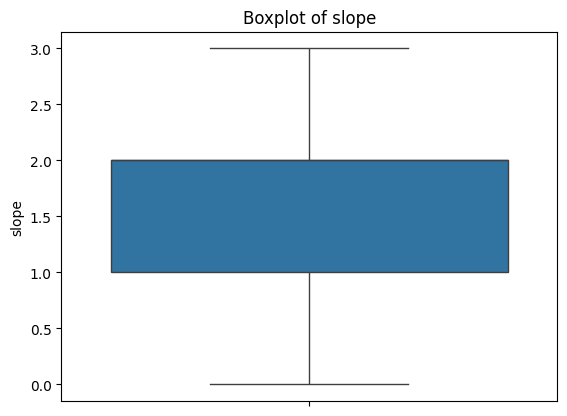

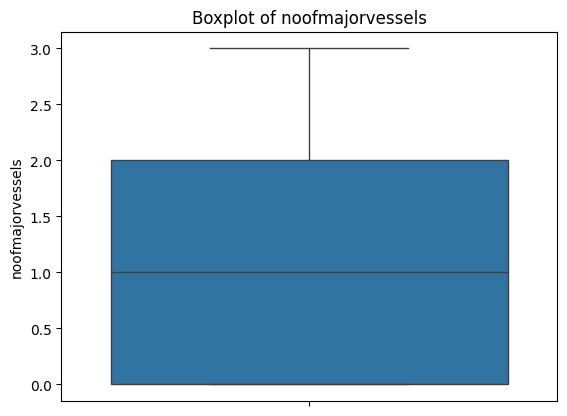

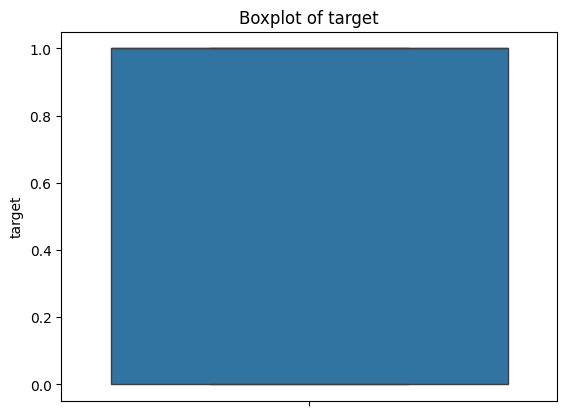


One-sample t-test for patientid:
 TtestResult(statistic=np.float64(1.377463673124566), pvalue=np.float64(0.2016536361925816), df=np.int64(9))

Independent t-test for patientid between two samples:
 TtestResult(statistic=np.float64(-0.6545630562386866), pvalue=np.float64(0.5210260420068539), df=np.float64(18.0))

Paired t-test for patientid:
 TtestResult(statistic=np.float64(-0.5182048901880983), pvalue=np.float64(0.6168129157204967), df=np.int64(9))

One-way ANOVA for patientid across three groups:
 F_onewayResult(statistic=np.float64(2.1429230687192), pvalue=np.float64(0.1368403249752684))


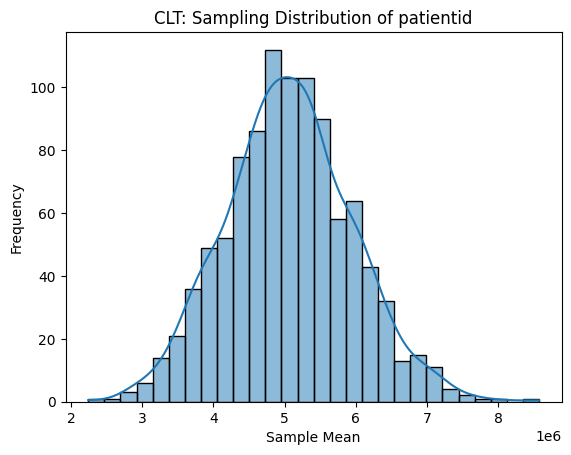


95% Confidence Interval for patientid: (np.float64(4463312.700656902), np.float64(7457000.499343097))

Z-statistic for patientid: 1.3774636731245662

Manual Binomial probability (n=10, k=2, p=0.1): 0.19371024450000007

Conditional probability (even | >3): 0.663411717815863


In [40]:
# Load dataset
df = pd.read_csv(r"C:\Users\ashvi\Documents\VS_Codes\VITWork\Second_Year\R(Probability_and_Statistics)\Cardiovascular_Disease_Dataset.csv")

# EDA - quick overview
print("Dataset shape:", df.shape)
print("\nNumerical columns:\n", df.select_dtypes(include=np.number).columns.tolist())
print("\nCategorical columns:\n", df.select_dtypes(exclude=np.number).columns.tolist())
print("\nFirst 5 rows:\n", df.head())
print("\nSummary statistics:\n", df.describe())

# Visualizations
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# Histograms for numerical columns
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# Boxplots for numerical columns
for col in numerical_cols:
    plt.figure()
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Countplots for categorical columns
for col in categorical_cols:
    plt.figure()
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.show()

# Choose tests based on variable type
# Example: Compare mean of first numerical column vs population mean
col = numerical_cols[0]
sample = df[col].sample(10, random_state=42)

# t-test
t_res = ttest_1samp(sample, popmean=df[col].mean())
print(f"\nOne-sample t-test for {col}:\n", t_res)

# Example: Independent t-test between two samples of same column
x1 = df[col].sample(10, random_state=1)
x2 = df[col].sample(10, random_state=2)
ind_t = ttest_ind(x1, x2)
print(f"\nIndependent t-test for {col} between two samples:\n", ind_t)

# Example: Paired t-test (simulate before/after)
before = df[col].sample(10, random_state=3)
after = before + np.random.normal(0, 1, 10)  # simulate small change
paired_t = ttest_rel(before, after)
print(f"\nPaired t-test for {col}:\n", paired_t)

# One-way ANOVA across three groups
group1 = df[col].sample(10, random_state=4)
group2 = df[col].sample(10, random_state=5)
group3 = df[col].sample(10, random_state=6)
anova_res = f_oneway(group1, group2, group3)
print(f"\nOne-way ANOVA for {col} across three groups:\n", anova_res)

# Central Limit Theorem demonstration
sample_means = [df[col].sample(10, replace=True).mean() for _ in range(1000)]
plt.figure()
sns.histplot(sample_means, kde=True)
plt.title(f'CLT: Sampling Distribution of {col}')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

# Confidence Interval for population mean
conf_int = stats.t.interval(0.95, len(sample)-1, loc=sample.mean(), scale=sample.sem())
print(f"\n95% Confidence Interval for {col}: {conf_int}")

# Z-test example
pop_mean = df[col].mean()
z_stat = (sample.mean() - pop_mean)/(sample.std(ddof=1)/np.sqrt(len(sample)))
print(f"\nZ-statistic for {col}: {z_stat}")

# Manual Binomial probability (example scenario)
from math import comb
binom_example = comb(10, 2) * (0.1**2) * (0.9**8)
print(f"\nManual Binomial probability (n=10, k=2, p=0.1): {binom_example}")

# Conditional probability simulation
np.random.seed(42)
n_sim = 10000
rolls = np.random.randint(1,7,n_sim)
prob = np.sum((rolls % 2 == 0) & (rolls > 3)) / np.sum(rolls > 3)
print(f"\nConditional probability (even | >3): {prob}")